In [225]:
print("Hello")

Hello


## Importing necessary library

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [227]:
# Checking the version of imported library
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('2.2.6', '2.3.1', '0.13.2', '3.10.0')

### Loading datasets and checking basic information of dataset

In [228]:
# Loading the Cars.csv Data sets
df= pd.read_csv('Cars.csv')

In [229]:
# Displaying first five samples
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [230]:
# Checking the shape that number of sample size and features
df.shape

(8128, 13)

In [231]:
# Checking datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [232]:
# Checking the nan values
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

## Some preprocessing being done as A1 Car Price Prediction


In [233]:
# Column owner has different categories, so before mapping, checking the categories in owner columna
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [234]:
# creating a dictionary mapping and mapping the owner column.
mapping = {'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':5}
df['owner']= df['owner'].map(mapping)

In [235]:
# Verifying the owner category 
df['owner'].value_counts()

owner
1    5289
2    2105
3     555
4     174
5       5
Name: count, dtype: int64

In [236]:
# for feautre fuel, remove all rows with CNG and LPG. Before that lets check the categori in the feature fuel
df['fuel'].unique()


array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [237]:
# Selecting the rows of feature fuel that does not contain CNG and LPG
df = df[~df['fuel'].isin(['CNG', 'LPG'])]
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [238]:
# Removing the kmpl fromt the feature mileage and converting the object data types to the float.
df['mileage']= df['mileage'].str.split().str[0].astype(float)

In [239]:
# Verifying the feature mileage and its object types
df['mileage'].head(3)

0    23.40
1    21.14
2    17.70
Name: mileage, dtype: float64

In [240]:
#  Removing the CC fromt the feature engine and converting the object data types to the float.
df['engine']= df['engine'].str.split().str[0].astype(float)
df['engine'].head()

0    1248.0
1    1498.0
2    1497.0
3    1396.0
4    1298.0
Name: engine, dtype: float64

In [241]:
#  Removing the CC fromt the feature engine and converting the object data types to the float.
df['max_power']= df['max_power'].str.split().str[0].astype(float)
df['max_power'].head()

0     74.00
1    103.52
2     78.00
3     90.00
4     88.20
Name: max_power, dtype: float64

In [242]:
# As mentioned brand, lets change the feature name to brand
df =df.rename(columns={'name':'brand'})

In [243]:
# Taking only the first word of the brand
df['brand']=df['brand'].str.split().str[0]

In [244]:
# verifying the df
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [245]:
# Droping the feature torque
df = df.drop(columns='torque')

In [246]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [247]:
# removing Test Drive Cars from the which was mapped to 5 in the owner feature
df =df[df['owner'] !=5]


In [248]:
# verifying Onwer
df['owner'].unique()

array([1, 2, 3, 4])

In [249]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 815.3+ KB


## Performing EDA

In [251]:
## Univariate Analyis
num_feature = df.select_dtypes(include=['int64','float64'])
cat_feature = df.select_dtypes(exclude=['int64','float64'])

<Axes: xlabel='mileage', ylabel='Count'>

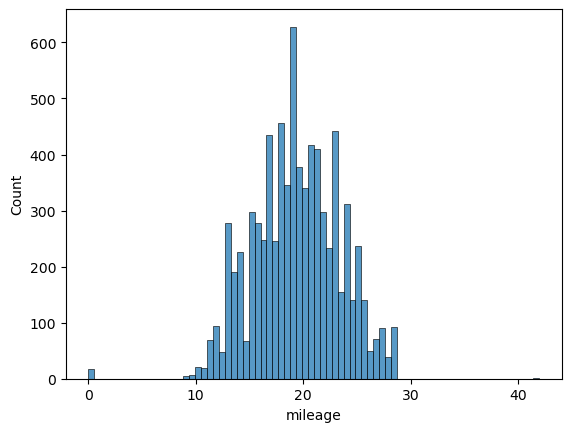

In [252]:
# Performing Univariate Analysis

sns.histplot(data= df, x= 'mileage')


<Axes: xlabel='selling_price', ylabel='Count'>

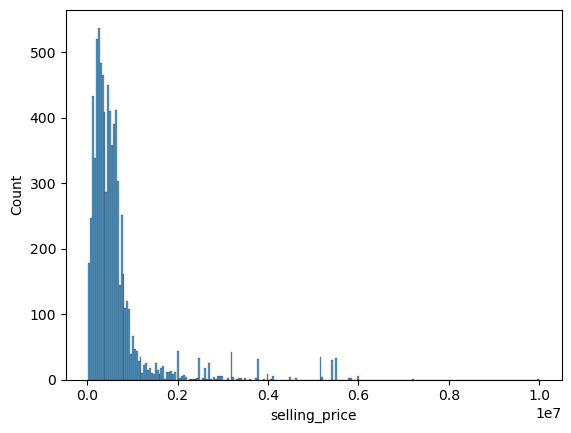

In [253]:
sns.histplot(data= df, x= 'selling_price')


<Axes: xlabel='fuel', ylabel='count'>

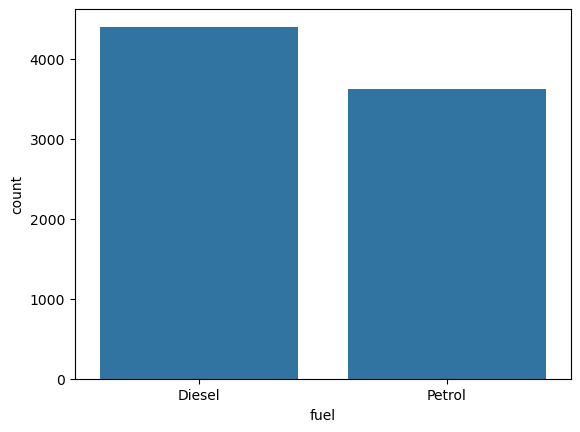

In [254]:
sns.countplot(data= df, x= 'fuel')


<Axes: xlabel='seller_type', ylabel='count'>

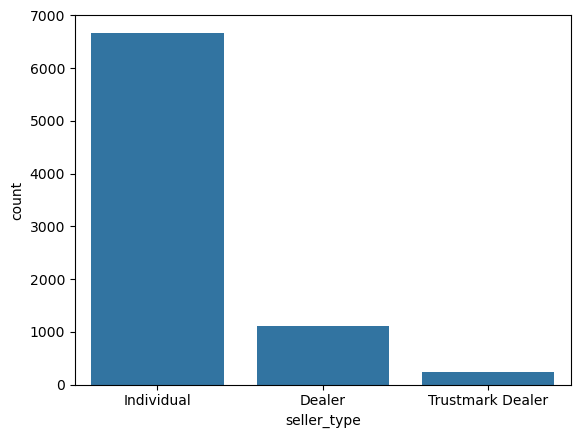

In [255]:
sns.countplot(data= df, x= 'seller_type')


<Axes: xlabel='transmission', ylabel='count'>

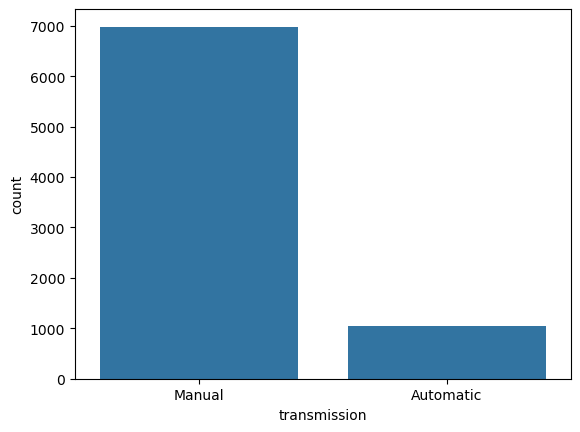

In [256]:
sns.countplot(data= df, x= 'transmission')


<Axes: xlabel='owner', ylabel='count'>

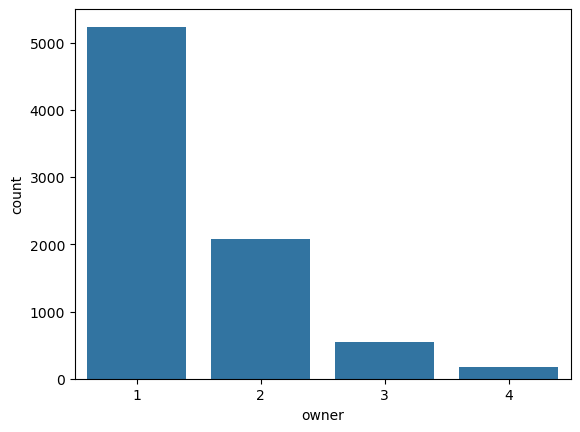

In [257]:
sns.countplot(data= df, x= 'owner')


<Axes: xlabel='engine', ylabel='Count'>

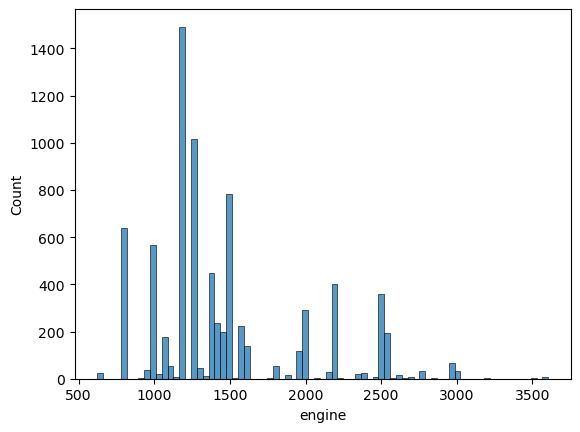

In [258]:
sns.histplot(data= df, x= 'engine')


<Axes: xlabel='max_power', ylabel='Count'>

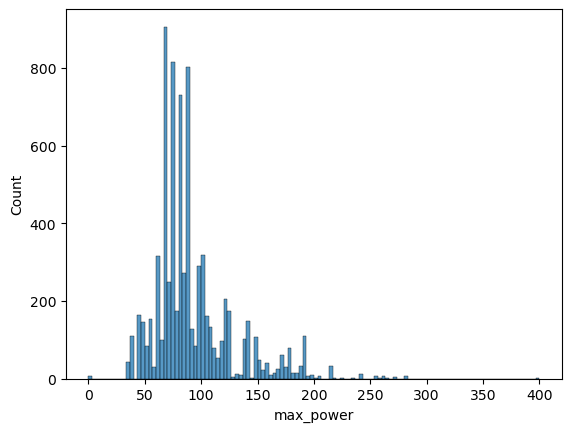

In [259]:
sns.histplot(data= df, x= 'max_power')


<Axes: xlabel='seats', ylabel='Count'>

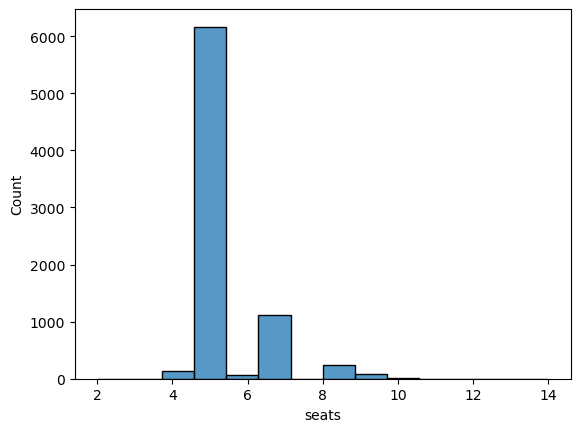

In [260]:
sns.histplot(data= df, x= 'seats')

### Bivariate Analysis

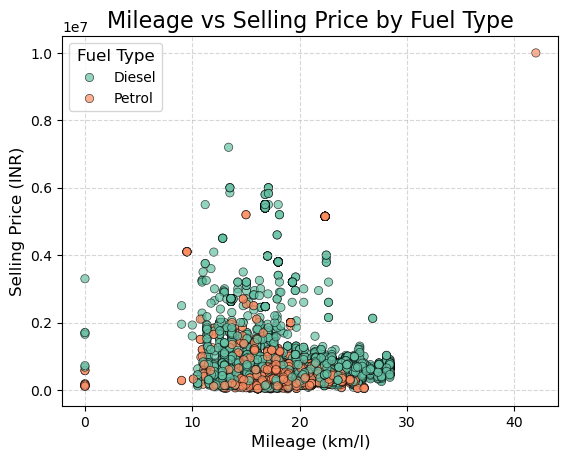

In [261]:
# sns.scatterplot(data = df,x='mileage', y= df['selling_price'], hue='fuel')
sns.scatterplot(data=df, x='mileage', y='selling_price', hue='fuel', sizes=(10, 20), palette='Set2',alpha=0.7, edgecolor='k',linewidth=0.5,marker='o')
plt.title("Mileage vs Selling Price by Fuel Type", fontsize=16)
plt.xlabel("Mileage (km/l)", fontsize=12)
plt.ylabel("Selling Price (INR)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Fuel Type', fontsize=10, title_fontsize=12)
plt.show()


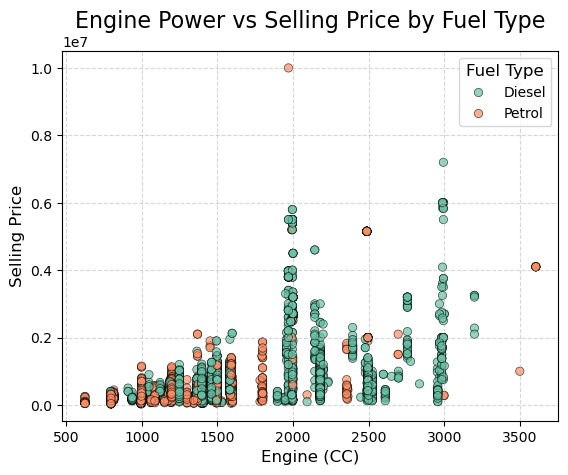

In [262]:
sns.scatterplot(data=df, x='engine', y='selling_price', hue='fuel', sizes=(10, 20), palette='Set2',alpha=0.7, edgecolor='k',linewidth=0.5,marker='o')
plt.title("Engine Power vs Selling Price by Fuel Type", fontsize=16)
plt.xlabel("Engine (CC)", fontsize=12)
plt.ylabel("Selling Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Fuel Type', fontsize=10, title_fontsize=12)
plt.show()

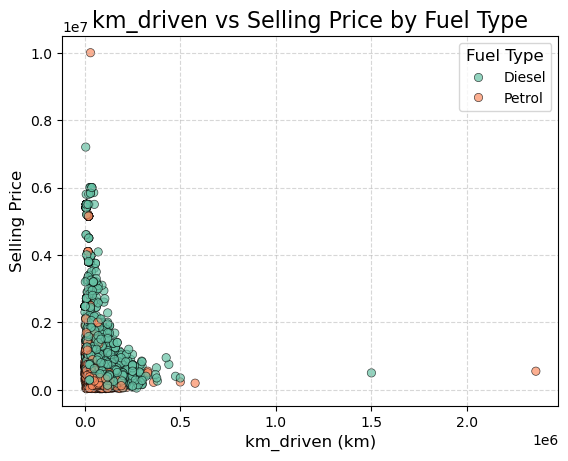

In [263]:
sns.scatterplot(data=df, x='km_driven', y='selling_price', hue='fuel', sizes=(10, 20), palette='Set2',alpha=0.7, edgecolor='k',linewidth=0.5,marker='o')
plt.title("km_driven vs Selling Price by Fuel Type", fontsize=16)
plt.xlabel("km_driven (km)", fontsize=12)
plt.ylabel("Selling Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Fuel Type', fontsize=10, title_fontsize=12)
plt.show()


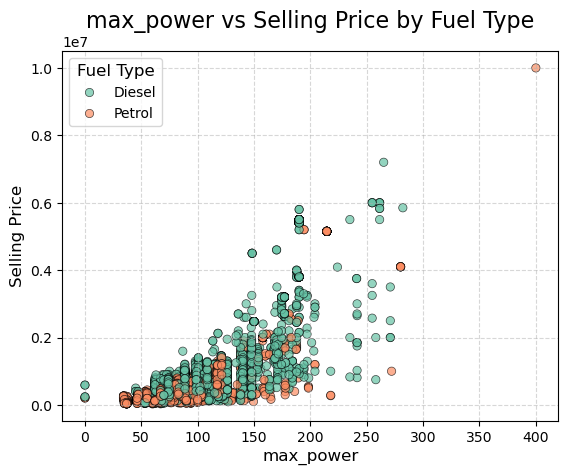

In [264]:
sns.scatterplot(data=df, x='max_power', y='selling_price', hue='fuel', sizes=(10, 20), palette='Set2',alpha=0.7, edgecolor='k',linewidth=0.5,marker='o')
plt.title("max_power vs Selling Price by Fuel Type", fontsize=16)
plt.xlabel("max_power", fontsize=12)
plt.ylabel("Selling Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Fuel Type', fontsize=10, title_fontsize=12)
plt.show()


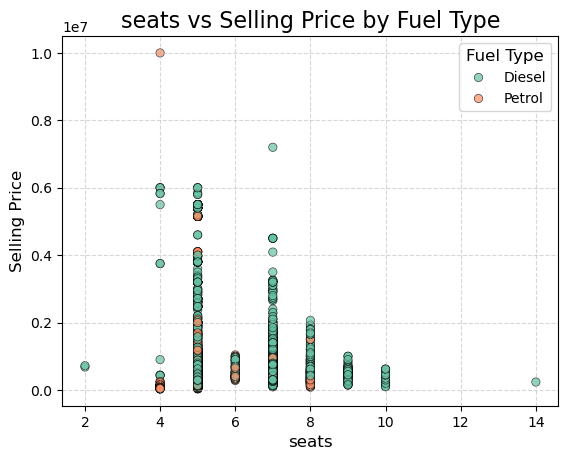

In [265]:
sns.scatterplot(data=df, x='seats', y='selling_price', hue='fuel', sizes=(10, 20), palette='Set2',alpha=0.7, edgecolor='k',linewidth=0.5,marker='o')
plt.title("seats vs Selling Price by Fuel Type", fontsize=16)
plt.xlabel("seats", fontsize=12)
plt.ylabel("Selling Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Fuel Type', fontsize=10, title_fontsize=12)
plt.show()

/var/folders/b3/_qnv83d10gzcyhls52ll3g3h0000gn/T/ipykernel_17212/4284989798.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='owner', y='selling_price', palette='Set2')


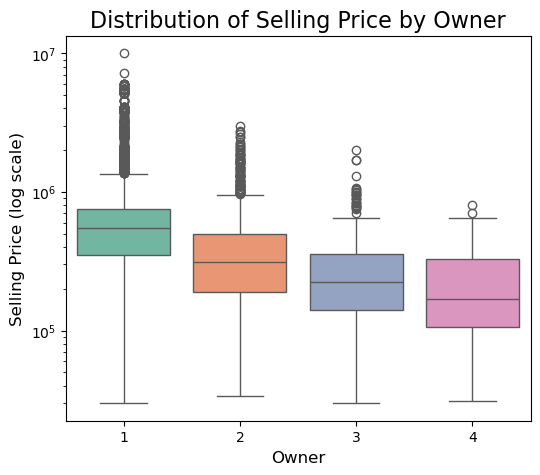

In [266]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x='owner', y='selling_price', palette='Set2')
plt.yscale('log')   # log scale to handle skewed values
plt.title("Distribution of Selling Price by Owner", fontsize=16)
plt.xlabel("Owner", fontsize=12)
plt.ylabel("Selling Price (log scale)", fontsize=12)
plt.show()


/var/folders/b3/_qnv83d10gzcyhls52ll3g3h0000gn/T/ipykernel_17212/2072901469.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='brand', y='selling_price', palette='Set2')


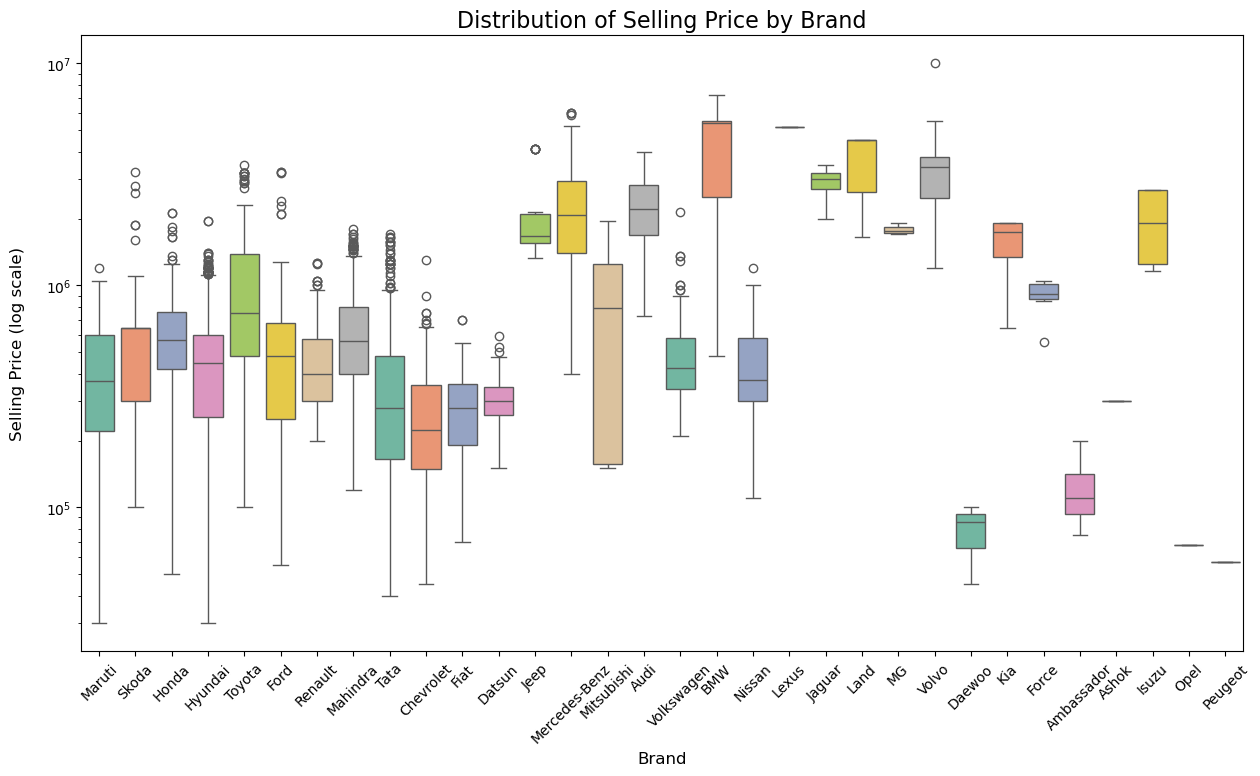

In [267]:
plt.figure(figsize=(15,8))  # make wider for readability
sns.boxplot(data=df, x='brand', y='selling_price', palette='Set2')
plt.yscale('log')   # log scale to handle skewed values
plt.title("Distribution of Selling Price by Brand", fontsize=16)
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Selling Price (log scale)", fontsize=12, rotation=90, labelpad=15)  # vertical label with padding
plt.xticks(rotation=45)  # rotate x-axis labels if too crowded
plt.show()

In [268]:
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

/var/folders/b3/_qnv83d10gzcyhls52ll3g3h0000gn/T/ipykernel_17212/2007723049.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='seller_type', y='selling_price', palette='Set2')


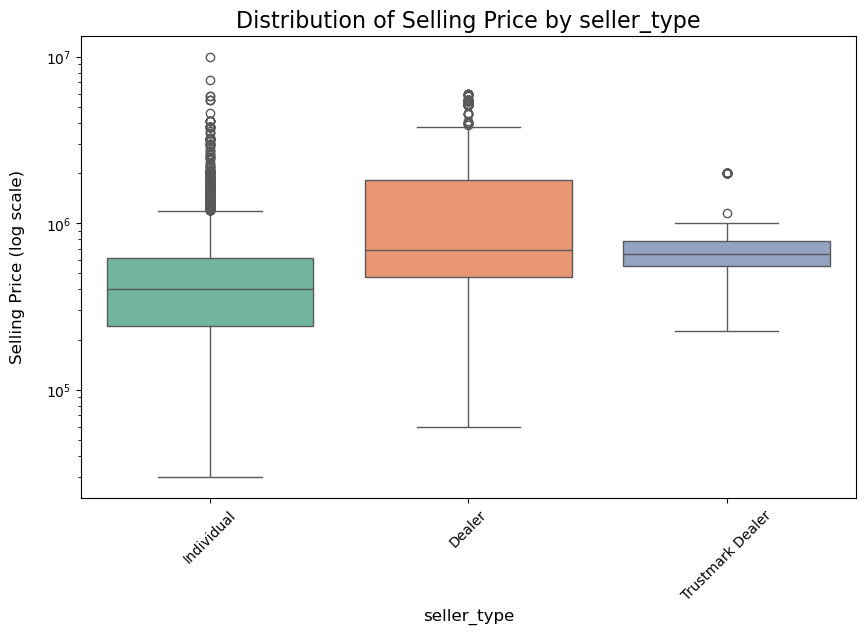

In [269]:
plt.figure(figsize=(10,6))  # make wider for readability
sns.boxplot(data=df, x='seller_type', y='selling_price', palette='Set2')
plt.yscale('log')   # log scale to handle skewed values
plt.title("Distribution of Selling Price by seller_type", fontsize=16)
plt.xlabel("seller_type", fontsize=12)
plt.ylabel("Selling Price (log scale)", fontsize=12, rotation=90, labelpad=15)  # vertical label with padding
plt.xticks(rotation=45)  # rotate x-axis labels if too crowded
plt.show()

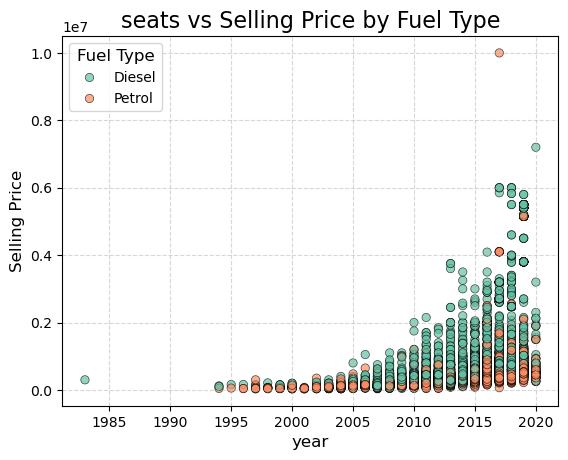

In [270]:
sns.scatterplot(data=df, x='year', y='selling_price', hue='fuel', sizes=(10, 20), palette='Set2',alpha=0.7, edgecolor='k',linewidth=0.5,marker='o')
plt.title("seats vs Selling Price by Fuel Type", fontsize=16)
plt.xlabel("year", fontsize=12)
plt.ylabel("Selling Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Fuel Type', fontsize=10, title_fontsize=12)
plt.show()

In [271]:
# Label Encoding Because I need to show the correlation
from sklearn.preprocessing import LabelEncoder
brand_encoder = LabelEncoder()
df['brand'] = brand_encoder.fit_transform(df['brand'])

fuel_encoder = LabelEncoder()
df['fuel'] = fuel_encoder.fit_transform(df['fuel'])

seller_type_encoder = LabelEncoder()
df['seller_type'] = seller_type_encoder.fit_transform(df['seller_type'])

transmission_encoder = LabelEncoder()
df['transmission'] = transmission_encoder.fit_transform(df['transmission'])





In [272]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,2014,450000,145500,0,1,1,1,23.40,1248.0,74.00,5.0
1,27,2014,370000,120000,0,1,1,2,21.14,1498.0,103.52,5.0
2,10,2006,158000,140000,1,1,1,3,17.70,1497.0,78.00,5.0
3,11,2010,225000,127000,0,1,1,1,23.00,1396.0,90.00,5.0
4,20,2007,130000,120000,1,1,1,1,16.10,1298.0,88.20,5.0


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8028 non-null   int64  
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   int64  
 5   seller_type    8028 non-null   int64  
 6   transmission   8028 non-null   int64  
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 815.3 KB


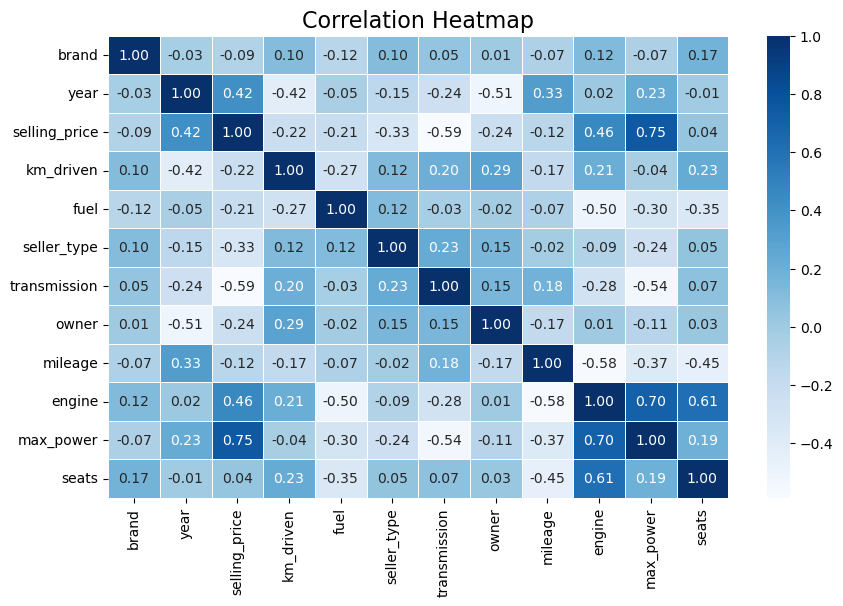

In [274]:
plt.figure(figsize=(10,6))
sns.heatmap(
    df.corr(),
    annot=True,          # show correlation numbers
    fmt=".2f",           # format decimals
    cmap="Blues",        # color map
    linewidths=0.5       # grid lines between cells
)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


In [275]:
# Now I am splitting the Dataset into Train and Test
from sklearn.model_selection import train_test_split
X = df.drop(columns='selling_price')
y = np.log(df['selling_price'])
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [276]:
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

In [277]:
# Checking the missing Values of X_train
X_train.isnull().sum()

brand             0
year              0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage         171
engine          171
max_power       165
seats           171
dtype: int64

In [278]:
# Checking the missing Values of X_test
X_test.isnull().sum()

brand            0
year             0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage         43
engine          43
max_power       43
seats           43
dtype: int64

In [279]:
# I have to change the missing value filling up later
for col in X_train.columns:
    if X_train[col].dtype in ['int64','float64']:
        X_train[col] = X_train[col].fillna(X_train[col].mean())
    else:
        X_train[col] = X_train[col].fillna(X_train[col].mode()[0])
        

In [280]:
X_train.isnull().sum()

brand           0
year            0
km_driven       0
fuel            0
seller_type     0
transmission    0
owner           0
mileage         0
engine          0
max_power       0
seats           0
dtype: int64

In [281]:
for col in X_test.columns:
    if X_test[col].dtype in ['int64','float64']:
        X_test[col] = X_test[col].fillna(X_test[col].mean())
    else:
        X_test[col] = X_test[col].fillna(X_test[col].mode()[0])

In [282]:
X_test.isnull().sum()

brand           0
year            0
km_driven       0
fuel            0
seller_type     0
transmission    0
owner           0
mileage         0
engine          0
max_power       0
seats           0
dtype: int64

In [283]:
X.head()

,brand,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,2014,145500,0,1,1,1,23.40,1248.0,74.00,5.0
1,27,2014,120000,0,1,1,2,21.14,1498.0,103.52,5.0
2,10,2006,140000,1,1,1,3,17.70,1497.0,78.00,5.0
3,11,2010,127000,0,1,1,1,23.00,1396.0,90.00,5.0
4,20,2007,120000,1,1,1,1,16.10,1298.0,88.20,5.0


In [288]:
# scalling
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train[num_cols] = scale.fit_transform(X_train[num_cols])
X_test[num_cols] = scale.transform(X_test[num_cols])


In [287]:
X_train.engine.dtype

dtype('float64')

In [ ]:
X_test.isnull().sum()

brand           0
year            0
km_driven       0
fuel            0
seller_type     0
transmission    0
owner           0
mileage         0
engine          0
max_power       0
seats           0
dtype: int64

In [299]:
# Modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeRegressor
import pickle


In [300]:

rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)

y_pred_test = rfr.predict(X_test)
y_pred_train = rfr.predict(X_train)

print("=== Test Set Evaluation ===")
print("MAE: ", mean_absolute_error(y_test, y_pred_test))
print("R2 : ", r2_score(y_test, y_pred_test))

print("\n=== Train Set Evaluation ===")
print("MAE: ", mean_absolute_error(y_train, y_pred_train))
print("R2 : ", r2_score(y_train, y_pred_train))

# ================================
# 6️⃣ Cross-Validation (Optional, More Robust)
# ================================
scores = cross_val_score(rfr, X_train, y_train, cv=5, scoring="r2")
print("\n=== Cross-validation R2 scores ===")
print(scores)
print("Mean R2: ", scores.mean())

=== Test Set Evaluation ===
MAE:  1.994579231440994
R2 :  -5.451539901091316

=== Train Set Evaluation ===
MAE:  0.05576391223975967
R2 :  0.9900040655137432

=== Cross-validation R2 scores ===
[0.93297288 0.9340615  0.94015218 0.93366109 0.92602851]
Mean R2:  0.9333752319782068


In [301]:
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state= 0),RandomForestRegressor(n_estimators=100,random_state=42), ]


In [81]:
dff = pd.read_csv('car_final_le.csv')

In [82]:
dff.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,2014,450000,145500,0,1,1,1,23.40,1248.0,74.00,5.0
1,27,2014,370000,120000,0,1,1,2,21.14,1498.0,103.52,5.0
2,10,2006,158000,140000,1,1,1,3,17.70,1497.0,78.00,5.0
3,11,2010,225000,127000,0,1,1,1,23.00,1396.0,90.00,5.0
4,20,2007,130000,120000,1,1,1,1,16.10,1298.0,88.20,5.0


In [83]:
from sklearn.model_selection import train_test_split
X = dff.drop(columns='selling_price')
y = np.log(dff['selling_price'])
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

X = dff.drop(columns='selling_price')
y = np.log(dff['selling_price'])
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [84]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train[num_cols] = scale.fit_transform(X_train[num_cols])
X_test[num_cols] = scale.transform(X_test[num_cols])

In [85]:
import mlflow
import os

# Set the MLflow tracking URI to the service name and port inside Docker
mlflow.set_tracking_uri("http://mlflow:5000")  

# Optional: set the user
os.environ["LOGNAME"] = "chaky"

# Set or create the experiment
mlflow.set_experiment("regularization")

<Experiment: artifact_location='/mlflow/605349644759327427', creation_time=1757091534732, experiment_id='605349644759327427', last_update_time=1757091534732, lifecycle_stage='active', name='regularization', tags={}>

In [86]:
# from sklearn.datasets import load_diabetes
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
import numpy as np
from time import time

# diabetes = load_diabetes()
# print("Features: ", diabetes.feature_names)
# X = diabetes.data
# y = diabetes.target
m = X.shape[0]  #number of samples
n = X.shape[1]  #number of features

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test  = scaler.transform(X_test)

# actually you can do like this too
# X = np.insert(X, 0, 1, axis=1)
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)

In [87]:
import numpy as np
import mlflow
from sklearn.model_selection import KFold

class LinearRegression(object):
    kfold = KFold(n_splits=3)
    
    def __init__(self, regularization, lr=0.001, method='batch', num_epochs=500,
                 batch_size=50, cv=kfold, init_method='xavier', use_momentum=False, momentum=0.9):
        self.lr = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.method = method
        self.cv = cv
        self.regularization = regularization
        self.init_method = init_method
        self.use_momentum = use_momentum      # add this
        self.momentum = momentum              # momentum factor between 0 and 1
        self.velocity = None                  # initialize velocity
        
    def mse(self, ytrue, ypred):
        return ((ypred - ytrue) ** 2).sum() / ytrue.shape[0]
    
    def fit(self, X_train, y_train):
        self.kfold_scores = list()
        self.val_loss_old = np.infty

        # Convert DataFrame/Series to numpy arrays if needed
        if hasattr(X_train, "to_numpy"):
            X_train = X_train.to_numpy()
        if hasattr(y_train, "to_numpy"):
            y_train = y_train.to_numpy()

        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val   = X_train[val_idx]
            y_cross_val   = y_train[val_idx]

            # Initialize weights
            if self.init_method == 'zeros':
                self.theta = np.zeros(X_cross_train.shape[1])
            elif self.init_method == 'xavier':
                limit = np.sqrt(6 / (X_cross_train.shape[1] + 1))
                self.theta = np.random.uniform(-limit, limit, size=X_cross_train.shape[1])
            else:
                raise ValueError("init_method must be 'zeros' or 'xavier'")

            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):
                params = {"method": self.method, "lr": self.lr, "reg": type(self).__name__,
                          "init_method": self.init_method}
                mlflow.log_params(params)

                for epoch in range(self.num_epochs):
                    perm = np.random.permutation(X_cross_train.shape[0])
                    X_cross_train_shuffled = X_cross_train[perm]
                    y_cross_train_shuffled = y_cross_train[perm]

                    if self.method == 'sto':
                        for i in range(X_cross_train_shuffled.shape[0]):
                            X_batch = X_cross_train_shuffled[i].reshape(1, -1)
                            y_batch = y_cross_train_shuffled[i]
                            train_loss = self._train(X_batch, y_batch)
                    elif self.method == 'mini':
                        for i in range(0, X_cross_train_shuffled.shape[0], self.batch_size):
                            X_batch = X_cross_train_shuffled[i:i+self.batch_size]
                            y_batch = y_cross_train_shuffled[i:i+self.batch_size]
                            train_loss = self._train(X_batch, y_batch)
                    else:  # full batch
                        train_loss = self._train(X_cross_train_shuffled, y_cross_train_shuffled)

                    mlflow.log_metric("train_loss", train_loss, step=epoch)
                    val_pred = self.predict(X_cross_val)
                    val_loss = self.mse(y_cross_val, val_pred)
                    mlflow.log_metric("val_loss", val_loss, step=epoch)

                    # early stopping
                    if np.allclose(val_loss, self.val_loss_old):
                        break
                    self.val_loss_old = val_loss

                self.kfold_scores.append(val_loss)
                print(f"Fold {fold}: {val_loss}")
    
    # def _train(self, X, y):
    #     y_pred = self.predict(X)
    #     m = X.shape[0]
    #     grad = (1/m) * X.T @ (y_pred - y) + self.regularization.derivation(self.theta)
    #     self.theta -= self.lr * grad
    #     return self.mse(y, y_pred)

    def _train(self, X, y):
        # Compute prediction and gradient
        y_pred = self.predict(X)
        m = X.shape[0]
        grad = (1/m) * X.T @ (y_pred - y) + self.regularization.derivation(self.theta)
    
        # Update parameters
        self._update(grad)
    
        return self.mse(y, y_pred)
    
    def _update(self, grad):
        # Momentum update
        if self.use_momentum:
            if self.velocity is None:
                self.velocity = np.zeros_like(grad)
            self.velocity = self.momentum * self.velocity + grad
            self.theta -= self.lr * self.velocity
        else:
            self.theta -= self.lr * grad
        
    
    def predict(self, X):
        return X @ self.theta
    
    
    def _coef(self):
        return self.theta[1:]
    
    def _bias(self):
        return self.theta[0]
    def r2(self, y_true, y_pred=None):
        """
        Compute R^2 score.
        If y_pred is None, will compute predictions from X (requires last used X)
        """
        if y_pred is None:
            raise ValueError("Provide y_pred or compute predictions first.")
        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        return 1 - ss_res / ss_tot

    def plot_feature_importance(self, feature_names=None, top_n=None):
        if self.theta is None:
            raise ValueError("Model has not been fitted yet.")

        # Use absolute values to rank importance
        importances = np.abs(self.theta[1:])  # exclude bias
        if feature_names is None:
            feature_names = [f"X{i}" for i in range(len(importances))]

        # Sort features by importance
        sorted_idx = np.argsort(importances)[::-1]
        if top_n is not None:
            sorted_idx = sorted_idx[:top_n]

        sorted_importances = importances[sorted_idx]
        sorted_features = [feature_names[i] for i in sorted_idx]

        # Plot
        plt.figure(figsize=(10, 6))
        plt.barh(sorted_features[::-1], sorted_importances[::-1])
        plt.xlabel("Feature importance (|coefficient|)")
        plt.title("Feature Importance")
        plt.show()


In [88]:
class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
    
class ElasticPenalty:
    
    def __init__(self, l = 0.1, l_ratio = 0.5):
        self.l = l 
        self.l_ratio = l_ratio

    def __call__(self, theta):  #__call__ allows us to call class as method
        l1_contribution = self.l_ratio * self.l * np.sum(np.abs(theta))
        l2_contribution = (1 - self.l_ratio) * self.l * 0.5 * np.sum(np.square(theta))
        return (l1_contribution + l2_contribution)

    def derivation(self, theta):
        l1_derivation = self.l * self.l_ratio * np.sign(theta)
        l2_derivation = self.l * (1 - self.l_ratio) * theta
        return (l1_derivation + l2_derivation)
    
class Lasso(LinearRegression):
    
    def __init__(self, method, lr, l):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization, lr, method)
        
class Ridge(LinearRegression):
    
    def __init__(self, method, lr, l):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, lr, method)
        
class ElasticNet(LinearRegression):
    
    def __init__(self, method, lr, l, l_ratio=0.5):
        self.regularization = ElasticPenalty(l, l_ratio)
        super().__init__(self.regularization, lr, method)

In [89]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [92]:

import mlflow
import pandas as pd
from itertools import product

def run_experiments(X_train, y_train, X_test, y_test):
    regs = ["LinearRegression", "Ridge", "Lasso", "ElasticNet"]
    methods = ["batch", "mini", "sto"]
    inits = ["zeros", "xavier"]
    lrs = [0.01, 0.001, 0.0001]
    momentum_options = [False, True]

    results = []

    for reg_name, method, init_method, lr, use_momentum in product(regs, methods, inits, lrs, momentum_options):

        # Regularization selection
        if reg_name == "LinearRegression":
            reg = RidgePenalty(0.0)
        elif reg_name == "Ridge":
            reg = RidgePenalty(0.1)
        elif reg_name == "Lasso":
            reg = LassoPenalty(0.1)
        elif reg_name == "ElasticNet":
            reg = ElasticPenalty(0.1, 0.5)

        # Initialize model
        model = LinearRegression(
            regularization=reg,
            lr=lr,
            method=method,
            init_method=init_method,
            use_momentum=use_momentum
        )

        run_name = f"{reg_name}-{method}-{init_method}-lr{lr}-mom{use_momentum}"
        # Ensure no previous active run
        if mlflow.active_run() is not None:
            mlflow.end_run()

        
        with mlflow.start_run(run_name=run_name, nested=True):  # nested=True avoids conflicts
            print(f"\nRunning: {run_name}")
            model.fit(X_train, y_train)
        
            y_pred = model.predict(X_test)
            mse = model.mse(y_test, y_pred)
            r2 = model.r2(y_test, y_pred)
            print(f"Test MSE: {mse}, R2: {r2}")
        
            mlflow.log_metrics({"test_mse": mse, "test_r2": r2})
            results.append({
                "reg": reg_name,
                "method": method,
                "init": init_method,
                "lr": lr,
                "momentum": use_momentum,
                "mse": mse,
                "r2": r2
    })

    return pd.DataFrame(results)


In [ ]:
results_df = run_experiments(X_train, y_train, X_test, y_test)


Running: LinearRegression-batch-zeros-lr0.01-momFalse
Fold 0: nan


In [ ]:
# def run_experiments(X_train, y_train, X_test, y_test):
#     regs = ["LinearRegression", "RidgePenalty", "LassoPenalty", "ElasticPenalty"]
#     methods = ['sto', 'mini', 'batch']
#     inits = ['zeros', 'xavier']
#     lrs = [0.01, 0.001, 0.0001]
#     momentum_options = [False, True]

#     results = []

#     for reg_name, method, init_method, lr, use_mom in product(regs, methods, inits, lrs, momentum_options):
#         if reg_name == "LinearRegression":
#             reg = RidgePenalty(0.0)  # no regularization
#         elif reg_name == "RidgePenalty":
#             reg = RidgePenalty(0.1)
#         elif reg_name == "LassoPenalty":
#             reg = LassoPenalty(0.1)
#         elif reg_name == "ElasticPenalty":
#             reg = ElasticPenalty(0.1, 0.5)

#         model = LinearRegression(regularization=reg, lr=lr, method=method, init_method=init_method,
#                                  use_momentum=use_mom)

#         run_name = f"{reg_name}-{method}-{init_method}-lr{lr}-mom{use_mom}"
#         with mlflow.start_run(run_name=run_name):
#             print(f"\nRunning: {run_name}")
#             model.fit(X_train, y_train)
#             y_pred = model.predict(X_test)
#             mse = model.mse(y_test, y_pred)
#             r2 = model.r2(y_test, y_pred)
#             print(f"Test MSE: {mse}, R2: {r2}")

#             mlflow.log_metrics({"test_mse": mse, "test_r2": r2})
#             results.append({"reg": reg_name, "method": method, "init": init_method,
#                             "lr": lr, "momentum": use_mom, "mse": mse, "r2": r2})

#     results_df = pd.DataFrame(results)
#     return results_df